# Домашнее задание 4-6

(прислать до 02:00 19.03.2019)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1
В этой задаче Вам предлагается выяснить, как можно ускорить сходимость градиентного спуска.

- (0.1  pts)Рассмотрите задачу минимизации дифференцируемой функции $f(x): X \to \mathbb{R}$ и напишите для неё шаг градиентного спуска

- Пусть задано некоторое невырожденое линейное преобразование $P^{1/2}: X \to Y$. 
Перенесём решение исходной задачи из пространства $X$ в пространство $Y$ с помощью вспомогательной функции 

$$
g(y) = f(P^{-1/2}y) = f(x)
$$

- (0.3 pts) Запишите шаг градиентного спуска в переменных $y$ и найдите выражение для $g'(y)$ через переменные $x$.

- (0.1 pts) Проверьте инвариантен ли градиент при линейном преобразовании?

- (0.2 pts) Преобразуйте выражение для шага градиентного спуска в пространстве $Y$ так, чтобы в нём фигурировали только исходные координаты, то есть отобразите его обратно в пространство $X$

- (0.5 pts) Исследуйте сходимость градиентного спуска для задачи 

$$
\min e^{x_1 + 3x_2 - 0.1} + e^{-x_1 - 0.1} + e^{x_1 - 3x_2 - 0.1},
$$

используя преобразования координат

$$
P_1 =
\begin{bmatrix}
3 & 0\\
0 & 10
\end{bmatrix}
\quad
P_2 =
\begin{bmatrix}
10 & 0\\
0 & 3
\end{bmatrix}
$$

Параметры функции поиска шага и начальную точку выберите самостоятельно.
Постройте график сходимости аналогичный тем, что были показаны на семинаре для каждого преобразования. Какое преобразование привело к ускорения сходимости и почему? Обратите внимание на оформление графика, сходимость метода измеряйте с помощью нормы градиента.

- (0.3 pts) Что такое предобуславливатели (preconditioner) для систем линейных уравнений? 
Какая цель в их использовании и какие предобуславливатели Вы знаете? 
Сравните предобуславливание с приведённой выше техникой ускорения сходимости. 
Что их объединяет? 

## Решение задачи 1

### Выбор шага
$$\textbf{x}^{k+1} = \textbf{x}^k - \alpha_{k+1} f'(\textbf{x})$$
$$\alpha_k = \arg\min_{\alpha\in[0,+\infty]}\left[f(\textbf{x}^k - \alpha f'(\textbf{x}^k))\right]$$

### Шаг для $g$

Пусть $A = P^{-1/2}, B = A^{-1}$.

$$\textbf{y}^{k+1} = \textbf{y}^k - \alpha_{k+1}g'(\textbf{y}^k)$$

$$\alpha_{k+1} = \arg\min_{\alpha\in[0,+\infty]}\left[g(\textbf{y}^k - \alpha g'(\textbf{y}^k))\right]$$

### Градиент для $g$

$$\frac{\partial g}{\partial y_k} = \frac{\partial f(\{\sum\limits_{j = 1}^{n}a_{ij}y_j,i=\overline{1,n}\})}{\partial y_k} = \sum\limits_{j=1}^na_{jk}\frac{\partial f}{\partial x_j}$$

$$\frac{\partial g(\textbf{y})}{\partial \textbf{y}} =A^\top\frac{\partial f(\textbf{x})}{\partial \textbf{x}},$$
$$\textbf{y} = B\textbf{x}$$

### Инвариантность

Из выше написанного пункта становится ясно, что градиент не инвариантен относительно линейного преобразования.

### Шаг для $g$ в координатах $\textbf{x}$

$$\alpha_k = \arg\min_{\alpha\in[0,+\infty]}\left[g(\textbf{y}^k - \alpha g'(\textbf{y}^k))\right]=$$
$$= \arg\min_{\alpha\in[0,+\infty]}\left[g(B\textbf{x}^k - \alpha A^\top f'(\textbf{x})\right]=$$
$$= \arg\min_{\alpha\in[0,+\infty]}\left[f\left(A(B\textbf{x}^k - \alpha A^\top f'(\textbf{x})\right)\right]=$$
$$= \arg\min_{\alpha\in[0,+\infty]}\left[f(\textbf{x}^k - \alpha AA^\top f'(\textbf{x}))\right]=$$
$$= \arg\min_{\alpha\in[0,+\infty]}\left[f(\textbf{x}^k - \alpha P^{-1} f'(\textbf{x}))\right],$$

где $P = P^{1/2}(P^{1/2})^\top$. Для симметричных матриц $P^{1 / 2}$ - обычный матричный корень $P$.

В таких обозначениях шаг градиентного спуска запишется, как:

$$\textbf{x}^{k+1} = \textbf{x}^k - \alpha_{k+1}P^{-1}f'(\textbf{x}^k)$$
$$\alpha_{k+1}= \arg\min_{\alpha\in[0,+\infty]}\left[f(\textbf{x}^k - \alpha P^{-1} f'(\textbf{x}))\right],$$

### Сходимость

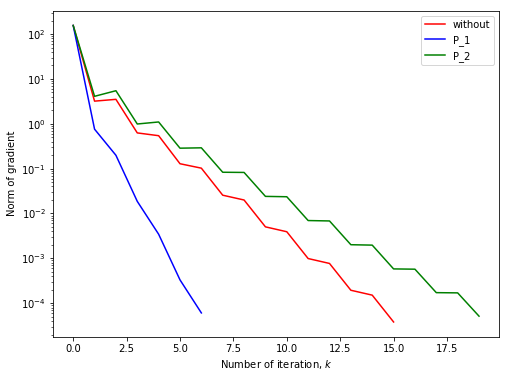

In [1]:
import numpy as np
from math import exp
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline


def get_step(f, h, x):
    alpha = cvx.Variable(pos = True)
    prob = cvx.Problem(cvx.Minimize(f(x - alpha * h)))
    prob.solve()
    return alpha.value

def obj_func(x):
    return cvx.exp(x[0] + 3*x[1]- 0.1) + cvx.exp(-x[0] -0.1) + cvx.exp(x[0] - 3*x[1]- 0.1)

def grad(x):
    g = []
    g.append(exp(x[0] + 3*x[1]- 0.1) - exp(-x[0] -0.1) + exp(x[0] - 3*x[1]- 0.1))
    g.append(3* exp(x[0] + 3*x[1]- 0.1)- 3 * exp(x[0] - 3*x[1]- 0.1))
    return np.array(g)

def grad_descent(f, x_0, get_grad, P, eps):
    N = 0
    x = x_0
    array = [np.linalg.norm(get_grad(x))]
    while N < 10000 and np.linalg.norm(get_grad(x)) > eps:
        h = np.dot(P, get_grad(x))
        x = x - get_step(f, h, x) * h
        array.append(np.linalg.norm(get_grad(x)))
        N +=1
    return array

P_list = []
P_list.append(np.array([[1,0], [0,1]]))
P_list.append(np.array([[3,0], [0,10]]))
P_list.append(np.array([[10,0], [0,3]]))

colors = ['r', 'b', 'g']
j = 0

plt.figure(figsize=(8, 6))
for P in P_list:
    x_0 = [1,1]
    array = grad_descent(obj_func, x_0, grad, np.linalg.inv(P), 1e-4)
    plt.semilogy([i for i in range(len(array))], array, colors[j])
    j+=1

plt.xlabel(r"Number of iteration, $k$")
plt.ylabel(r"Norm of gradient")
plt.legend(['without', r'P_1', r'P_2'])

Ускорение дало только преобразование $P_1$. Преобразование $P_2$ замедлило сходимость. Поскольку первое решение приблизило множество уровней к форме круга, что позволяет лучше сходиться, второе же только усугубило это. Так же можно размышлять в терминах числа обусловленности.

### Preconditioner

Предобуславливание линейной системы - предварительное преобразование линейной системы, которое выполняется с целью уменьшения числа обусловленности. Примером предобуславливания является замена системы $A\textbf{x} -\textbf{b} = 0$ на эквивалентную $P^{-1}(A\textbf{x} -\textbf{b}) = 0$. Шаг итерационного метода в этом случае будет записан следующим образом:

$$\textbf{x}_{k+1} = \textbf{x}_k - \alpha P^{-1}(A\textbf{x}_k -\textbf{b})$$

Как легко видеть, предобуславливание линейной системы похоже на проделанное выше преобразование формой записи шага градиентного спуска и итерации. Так же оба метода есть предварительное преобразование с целью ускорения решения.

## Задача 2

- (0.2 pts) Покажите, что градиенты, полученные на двух последовательных шагах градиентного спуска с использованием правила наискорейшего спуска, ортогональны.

- (0.5 pts) Докажите, что если целевая функция $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x$, $Q \in \mathbb{S}^n_{++}$, шаг определяется с помощью наискорейшего спуска и $x^0 - x^*$ параллелен собственному вектору матрицу $Q$, то градиентный спуск сходится за один шаг. 

- Покажите, что для $f(x) = x^{\top}x$ градиентный спуск с выбором шага по правилу наискорейшего спуска сходится за одну итерацию:
    - (0.1 pts) с использованием предыдущего утверждения
    - (0.2 pts) прямым вычислением 

## Решение задачи 2

### Доказательство ортагональности

Рассмотрим функцию:

$$g(\alpha) = f(\textbf{x}_k - \alpha f'(\textbf{x}_k))$$

Т.к. $\alpha_k = \arg\min_{\alpha}f(\textbf{x}_k - \alpha f'(\textbf{x}_k))$, то

$$g'(\alpha_k) = 0$$

С другой стороны:

$$g'(\alpha_k) = \left(f\left(\textbf{x}_k - \alpha f'(\textbf{x}_k)\right)\right)_\alpha'\Big|_{\alpha=\alpha_k} =  -f'(\textbf{x}_k - \alpha_k f'(\textbf{x}_k))f'(\textbf{x}_k) = -(f'(\textbf{x}_{k+1}), f'(\textbf{x}_k))$$

Выше под произведением градиентов понимается их скалярное произведение. Из выше написанного следует, что скалярное произведение полученных на двух последовательных итерациях градиентах в наискорейшем спуске равно нулю, что равносильно ортогональности.

### Про $Q$

$$\alpha = \arg\min_\alpha f(\textbf{x}_0 - \alpha f'(\textbf{x}_0)) $$

Если мы докажем, что существует такое $\alpha$, что $\textbf{x}_0 - \alpha f'(\textbf{x}_0) = \textbf{x}^*$, то мы докажем и требуемое утверждение. Для этого найдем такое $\alpha$, решив уравнение

$$\textbf{x}_0 - \alpha f'(\textbf{x}_0) = \textbf{x}^*$$
$$-\alpha (Q\textbf{x}_0 - \textbf{b}) = \textbf{x}^* - \textbf{x}_0$$
$$\alpha Q(\textbf{x}^* - \textbf{x}_0) - \alpha(Q\textbf{x}^*- \textbf{b}) = \textbf{x}^* - \textbf{x}_0$$

Второе слагаемое в левой части есть градиент в точке $\textbf{x}^*$, который равен нулю в силу оптимальности (по условию). Тогда пользуясь этим и тем, что $\textbf{x}^* - \textbf{x}_0$ -собственный вектор, получаем:

$$\alpha\lambda(\textbf{x}^* - \textbf{x}_0) = (\textbf{x}^* - \textbf{x}_0)$$

Что означает, что $\alpha = \frac{1}{\lambda}$ есть решение уравнения, и действительно, наискорейший спуск сойдется за одну итерацию.

### Про $f(\textbf{x}) = \textbf{x}^\top\textbf{x}$

Эта задача есть частный случай задачи из предыдущего пункта при $Q$, равной единичной матрице, и при нулевом векторе $\textbf{b}$. Оптимальное решение есть $\textbf{x}^* = \textbf{0}$ и $\textbf{x}^* - \textbf{x}_0 = \textbf{x}_0$ есть собственный вектор единичной матрицы для любого $\textbf{x}_0$. В силу доказанного, наискорейший пуск сойдется за одну итерацию.

Давайте проверим это.

$$\textbf{x}_0 = \text{some point}$$
$$\alpha = \arg\min_\alpha f(\textbf{x}_0 - \alpha f'(\textbf{x}_0)) = \arg\min_\alpha f(\textbf{x}_0 - \alpha \textbf{x}_0) = \arg\min_\alpha (1-\alpha)^2\|\textbf{x_0}\| = 1$$
$$\textbf{x}_1 = \textbf{x}_0 - f'(\textbf{x}_0)) = \textbf{0} = \textbf{x}^*$$

Как видим, метод сходится за одну итерацию из любой точки.

## Задача 3

- (0.6 pts) Решите задачу наискорейшим спуском

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

при 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

и начальной точкой $x^0 = 0$ с точностью по норме градиента $10^{-6}$. 

- (0.2 pts) Постройте график сходимости, насколько сходимость быстрая? 
- (0.2 pts) Найдите спектр матрицы $A$ (покажите, как Вы его искали) и сравните полученный график сходимости с графиком сходимости, полученным из теоретических соображений.

## Решение задачи 3

### Скорость сходимости

Вычислим $\alpha_k$ явно для данной функции.

$$G(\alpha)=f(\textbf{x} - \alpha f'(\textbf{x})) = f \left(x - \frac{\alpha}{2}(A^\top+A)\textbf{x} +\alpha \textbf{b}\right) =$$

$$=\left(x - \frac{\alpha}{2}(A^\top+A)\textbf{x} +\alpha \textbf{b}\right)^\top A \left(x - \frac{\alpha}{2}(A^\top+A)\textbf{x} +\alpha \textbf{b}\right) - \textbf{b}^\top\left(x - \frac{\alpha}{2}(A^\top+A)\textbf{x} +\alpha \textbf{b}\right)$$

$$G'(\alpha) = 0$$

$$\alpha = \frac{\textbf{x}^\top A\left(\frac{1}{2}(A^\top+A)\textbf{x} - \textbf{b}\right) - \textbf{b}^\top \left(\frac{1}{2}(A^\top+A)\textbf{x} - \textbf{b}\right)}{\left(\frac{1}{2}(A^\top+A)\textbf{x} - \textbf{b}\right)^\top A \left(\frac{1}{2}(A^\top+A)\textbf{x} - \textbf{b}\right)}$$

Показатель q =0.28


Text(0, 0.5, 'Norm of gradient')

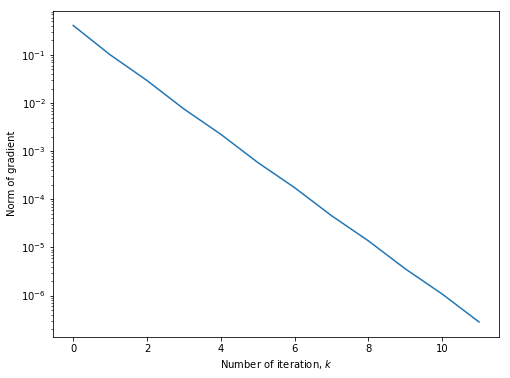

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class QF:
    def __init__(self, A, b):
        self.A = A
        self.b = b
    
    def calc(self, x):
        return 1./2 * x.dot(self.A.dot(x)) - self.b.dot(x)
    
    def grad(self, x):
        return (self.A+self.A.T).dot(x) *  1./ 2 - self.b
    
    def argmin(self, x):
        A = self.A
        b = self.b
        alpha = ((x.dot(A.dot((1./2 * (A + A.T).dot(x) - b)))+
                   b.dot(-1./2 * (A + A.T).dot(x) + b))/
                  ((1./2 * (A + A.T).dot(x) - b).dot(A.dot((1./2 * (A + A.T).dot(x) - b)))))
        return alpha

def grad_descent(f, x_0, eps):
    N = 0
    x = x_0
    array = []
    while N < 100 and np.linalg.norm(f.grad(x)) > eps:
        x = x - f.argmin(x) * f.grad(x)
        array.append(np.linalg.norm(f.grad(x)))
        N +=1
    return array

plt.figure(figsize=(8, 6))

A = np.array([[0.78, -0.02, -0.12, -0.14],
[-0.02, 0.86, -0.04, 0.06],
[-0.12, -0.04, 0.72, -0.08],
[-0.14, 0.06, -0.08, 0.74]])
b = np.array([0.76, 0.08, 1.12, 0.68])
x_0 = np.zeros((4,))
x_0[0] = 1
f = QF(A, b)
array = grad_descent(f, x_0, 1e-6)
plt.semilogy([i for i in range(len(array))], array)
print('Показатель q =%.2f'%(np.mean([array[i+1]/array[i] for i in range(len(array)-1)])))
plt.xlabel(r"Number of iteration, $k$")
plt.ylabel(r"Norm of gradient")

Из графика видно, что скорость сходимости по норме градиента линейная линейная с показателем $q\approx 0.3$.

Есть результаты, утверждающие, что в общем случае скорость сходимости наискорейшего спуска не лучше скорости сходимости градиентного спуска с оптимальным шагом, т.е. линейная с показателем $q = \frac{M-1}{M+1},$ где $M = \frac{L}{\mu}$. В нашем случае, $M = \frac{\max_i|\lambda_i(A)|}{\min_i|\lambda_i(A)|}$. Исследуем спектр матрицы $A$ для получения теоретической оценки скорости сходимости.

Как известно, отыскать спектр матрицы $A$ эквивалентно задаче нахождения ортогональной матрицы $T$, такой что

$$\Lambda = T^\top AT,$$
где $\Lambda$ - диагональная матрица. Очевидно, данное преобразование минимизирует сумму квадратов внедиагональных элементов. Решение этой задачи оптимизации, соответственно, даст решение исходной. Для решения задачи поиска спектра воспользуемся готовой реализацией в пакете numpy.linalg.

In [3]:
S = np.linalg.eig(A)[0]
l_max = max([abs(i) for i in S])
l_min = min([abs(i) for i in S])
M = l_max/ l_min
q = (M - 1) / (M + 1)
print('Spectrum =', S, '\nlambda_max = %.2f\nlambda_min = %.2f\nM = %.2f\nq = %.1f'%(l_max, l_min, M, q))

Spectrum = [0.52 0.94 0.88 0.76] 
lambda_max = 0.94
lambda_min = 0.52
M = 1.81
q = 0.3


Как можно легко видеть, скорость сходимости полученная на практике совпала с теоретической.

## Задача 4 (1 pts)

Упражнение 1.3 из [пособия лектора](https://arxiv.org/ftp/arxiv/papers/1711/1711.00394.pdf). Пожалуйста, пишите чёткие обоснования для каждого перехода в доказательстве.

## Решение задачи 2

### Доказательство пункта 1.

Далее для упрощения записи будем считать, что $F$ есть функция $F_{2N+1}$ из условия.

1) Найдем выражение для градиента.

$$\nabla F(\textbf{x}) = \frac{L}{4}\left(x_1 - 1 + (x_1 - x_2)\dots(x_m - x_{m-1}) + (x_m - x_{m+3})\dots (x_{2N+1} - x_{2n}) + x_{2N+1}, 0,\dots 0\right)^\top,$$
где $m = \overline{2, 2N}$.

2) Стартуя из точки $\textbf{x}_0 = \textbf{0}$ точка $\textbf{x}_k$ может иметь не более чем $k$ ненулевых элементов, причем эти элементы находятся в начале. Докажем это утверждение по индукции.

База индукции. $\textbf{x}_1 = \alpha\nabla F(\textbf{x}_0)$. Градиент $\nabla F(\textbf{x}_0)$ в точке $\textbf{0}$ имеет только одну ненулевую первую компоненту, а, значит, и $\textbf{x}_1$ имеет только одну ненулевую компоненту.

Пусть утверждение верно для всеx $\textbf{x}_m, m\leq k$. Тогда $\nabla F(\textbf{x}_m)$ имеет не более $m+1$ ненулевой компоненты, т.к. для более старшие компоненты выражаются через линейные функции от $\{\textbf{x}\}_{m+1}^n$, которые равны нулю. Тогда в силу выбора модели и  $\textbf{x}_{k+1}$ имеет только $k+1$ ненулевую комопненту.

3) найдем значения $\min\limits_{k=\overline{1,N}}F(\textbf{x}_k)$ и  $F(\textbf{x}^*)$

$$F(\textbf{x}^*) = \frac{L}{8}\left(\left[\left(\frac{2N+1}{2N+2}\right)^2 + \frac{2N}{(2N+2)^2} + \frac{1}{(2N+2)^2}\right] - \frac{4N + 2}{2N+2}\right)=$$

$$ = \frac{L}{8}\frac{-4N^2 -6N - 2}{(2N+2)^2}$$

$$\min\limits_{k=\overline{1,N}}F(\textbf{x}_k) = \min\limits_{\textbf{x}|x_i =0,\forall i > N}F(\textbf{x})=$$

$$= \min\limits_{x_m, m = \overline{1, N}}\frac{L}{8}\left(x_1^2 + \sum\limits_{m = 1}^{N-1}(x_i - x_{i+1}^2) - 2x_1 + x_N^2\right)$$

Выше написанный минимум достигается, когда все $\textbf{x}$ определяется так же как $\textbf{x}^*$ в исходной задаче, только вместо $2N+1$ будет $N$, т.е. при
$$\textbf{x} = \left(1 - \frac{1}{N+1}, 1 - \frac{2}{N+1} \dots 1 - \frac{N}{N+1},0\dots 0\right)^\top$$

В таком случае, получаем:

$$\min\limits_{k=\overline{1,N}}F(\textbf{x}_k) = \frac{L}{8}\left(\left[\left(\frac{N}{N+1}\right)^2 + \frac{N - 1}{(N+1)^2} + \frac{1}{(N+1)^2}\right] - \frac{2N}{N+1}\right)=$$
$$=\frac{L}{8}\frac{-N^2 - N}{(N+1)^2}$$

4) Пользуясь выше написанными утверждениями, получаем:

$$\min\limits_{k=\overline{1,N}}F(\textbf{x}_k) - F(\textbf{x}^*) = $$

$$ = \frac{L}{8}\frac{-N^2 - N}{(N+1)^2} + \frac{L}{8}\frac{4N^2 +6N +2}{(2N+2)^2} = $$

$$=\frac{L}{32} \frac{2N + 2}{(N+1)^2}$$

Заметим, что

$$\|\textbf{x}_0 - \textbf{x}^*\| = \|\textbf{x}^*\|=\sum\limits_{m=1}^{2N+1}\left(1 - \frac{m}{2N+2}\right)^2 = $$
$$= \frac{\sum\limits_{m=1}^{2N+1}m^2 }{(2N + 2)^2} = $$
$$=\frac{(2N+1)(2N+2)(4N+3)}{6(2N+2)^2} = $$
$$=\frac{(2N+1)(4N+3)}{6(2N+2)}=$$
$$=\frac{1}{3}\left(2N+1+\frac{1}{2N+2}\right) \leq \frac{2N+2}{3}$$

Используя выше доказанные факты, получим требуемое утверждение:

$$\boxed{\min\limits_{k=\overline{1,N}}F(\textbf{x}_k) - F(\textbf{x}^*) \geq \frac{3L}{32}\frac{\|\textbf{x}_0-\textbf{x}^*\|}{(N+1)^2}}$$

5) Докажем утверждения для аргумента, используя то, что у $\textbf{x}_k$ может быть не больше $k$ ненулевых компонент, и то, что мы рассматриваем $k\geq N$.

$$\|\textbf{x}_k - \textbf{x}^*\| \geq \sum\limits_{m = N+1}^{2N+1}\left(1 - \frac{m}{2N+2}\right)^2=$$
$$= \frac{\sum\limits_{m = 1}^{N+1}m^2}{(2N+2)^2} = \frac{(N+1)(N+2)(2N+3)}{6(2N+2)^2} = \frac{(N+2)(2N+3)}{24(N+1)}\geq$$
$$\geq\frac{1}{8}\frac{2N+2}{3}\geq \frac{1}{8}\|\textbf{x}_0-\textbf{x}^*\|$$

### Доказательство пункта 2

...

## Задача 5 (0.5 pts)

Покажите, что сопряжённые направления являются линейно независимыми

## Решение задачи 5

Докажем линейную независимость сопряженных направлений от противного.

Пусть у нас есть два сопряженных направления $\textbf{p}$ и $\textbf{q}$ относительно матрицы $A\in\mathbb{S}^n_{++}$, а так же есть два ненунлевых числа $\alpha, \beta$, таких что

$$\alpha\textbf{p}+\beta\textbf{q}=0$$

Тогда умножив это равенство на $A\textbf{p}$ слева, получим что в силу сопряженности направления $\beta\textbf{q}^\top A\textbf{p}$, и в силу положительной определенности матрицы $\textbf{p}^\top A\textbf{p} > 0$ ($\textbf{p}$ - не нулевой). Из чего получим, что $\alpha = 0$. А в силу того, что и $\textbf{q}\neq 0$, получаем, что $\beta = 0$. Значит, мы получили противоречие, на чем доказательство можно считать законченным.

## Задача 6

- (0.3 pts) Проверьте, что направления в методе сопряжённых градиентов для квадратичной целевой функции и в методе Флетчера-Ривса являются направлениями убывания. Для любой ли стратегии линейного поиска шага в методе Флетчера-Ривса полученное направление будет направлением убывания? Почему?

- (0.7 pts) Даёт ли процедура дробления шага шаг, удовлестворяющий условию Вольфа? Если нет, то почему и как её нужно модифицировать, чтобы найти шаг, удовлетворяющий условию Вольфа? Покажите экспериментально, что предложенная Вами процедура работает.

## Решение задачи 6

- Направленя для квадратичной функции являются направлениями убывания.

Докажем вспомогательное утверждение: $\textbf{p}_{k-1}$ и $\textbf{r}_k$ ортогональны.

$$\textbf{p}_{k-1}^\top\textbf{r}_k = \textbf{p}_{k-1}^\top\left(A\textbf{x}_k - b\right) = \textbf{p}_{k-1}A(\textbf{x}_k-\textbf{x}^*) = \textbf{p}_{k-1}A\left(\sum\limits_{j = k}^n\textbf{p}_j\right) = \dots$$

Последнее равенство написано в силу того, что $CG$ сойдется за $n$ итерация для квадратичных функций.
$$\dots = \sum\limits_{j = k}^n\textbf{p}_{k-1}A\textbf{p}_j = 0\text{ - в силу сопряженности направлений}$$

Тогда получаем, что $\textbf{p}_k^\top\textbf{r}_k = -\|\textbf{r}_k\|^2$. Значит, направление $p_k$ лежит в одном полупространстве с антиградиентом, т.е. являет направлением убывания.

В методе Флетчера-Ривса такое может и не наблюдаться при произвольном шаге. В этом случае становится ясно, что вспомогательное утверждение не работает и можно подобрать точки так, чтобы $\textbf{p}_k^\top\textbf{r}_k$ было больше нуля, что и означает, что направление не будет направлением убывания.

## Задача 7 (1 pts)

Исследуйте зависимость числа итераций необходимого для сходимости линейного метода сопряжённых градиентов от распределения собственных значений матрицы $A$. 
Рассмотрите следующие сценарии:

- собственные значения распределены равномерно на некотором отрезке
- собственные числа распределены блоками около некоторых заданных чисел в окрестности радиуса $\varepsilon$, например каждые 5 собственных значений находятся в окрестности радиуса $0.5$ около чисел кратных 5. Придумайте свою стратегию генерации матриц по заданному сценарию

Постройте соответствующий график для каждого сценария. Если сценарий зависит от параметра, то на одном графике изобразите зависимость для нескольких наиболее характерных параметров, добавьте легенду и сделайте вывод об устойчивости оценки сходимости метода сопряжённых градиентов относительно распределение спектра матрицы.

## Решение задачи 7

Text(0, 0.5, "Function's value")

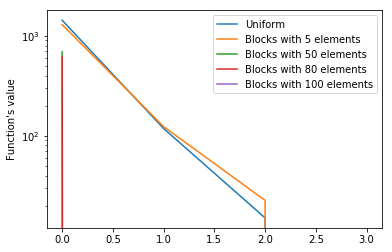

In [4]:
import numpy as np
import random
class rand_matrix:
    def __init__(self, n):
        self.n = n
    R = 100
    m = 1

    def get_diag_uniform(self):
        L = np.random.uniform(0, self.R, self.n)
        return np.diag(L)
    
    def get_diag_blocks(self, eps):
        m = self.m
        num = int(self.n  / m) + 1
        centers = np.linspace(0 + eps, self.R - eps, int(self.n  / m) + 1)
        arr = []
        for i in range(int(self.n  / m)+1):
            arr.append(np.random.uniform(centers[i] - eps, centers[i] +eps, m))
        list_eig = [np.array(arr).reshape((len(arr) * m))[i] for i in range(self.n)]
        list_eig = sorted(list_eig, key=lambda *args: random.random())
        return np.diag(np.array(list_eig))
    
    def transform(self, A):
        B = np.random.uniform(-self.R, self.R, (self.n, self.n))
        Q = np.linalg.qr(B)[0]
        return (Q.T).dot(A.dot(Q))
    
    def generator(self, args):
        if args[0] == 'u':
            A = self.get_diag_uniform()
        if args[0] == 'blocks':
            self.m = args[1]
            A = self.get_diag_blocks(args[2])
        return self.transform(A)

def ConjugateDirections(x_0, A, b):
    x = x_0
    # p = np.linalg.eig(A)[1]
    if min(np.linalg.eig(A)[0]) < 0:
        print('err')
    r = A.dot(x) - b
    arr = []
    arr.append(x.dot(A.dot(x)) - b.dot(x))
    p = -r
    while arr[-1] > 1e-14:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
        arr.append(x.dot(A.dot(x)) - b.dot(x))
    return arr

def conj_grad(A):
    return []
    
gen = rand_matrix(100)
A = gen.generator(['u'])
A_blocks = [(gen.generator(['blocks', i, 1e-1]), i) for i in [5, 50, 80, 100]]

b = np.random.uniform(-10, 10, 100)
x_0 = np.random.uniform(-1, 1, 100)
results = []
res = ConjugateDirections(x_0, A, b)
plt.semilogy([i for i in range(len(res))], res)
k = 0
for i in A_blocks:
    res = ConjugateDirections(x_0, i[0], b)
    plt.semilogy([i for i in range(len(res))],res)
    k += 1
    
plt.legend(['Uniform', 'Blocks with 5 elements', 'Blocks with 50 elements', 
            'Blocks with 80 elements', 'Blocks with 100 elements'])
plt.ylabel("Function's value")

Из выше построенного графика можно сделать вывод, что скорость метода сопряженных градиентов достаточно устойчива относительно вида спектра матрицы.

## Задача 8 (1 pts)

Сравните сходимость градиентного спуска, метода сопряжённых градиентов, метода тяжёлого шарика и ускоренного метода Нестерова для задачи

$$
\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right)
$$

Матрицу $A \in \mathbb{R}^{m \times n}$ и вектор $b$ сгенерируйте случайным образом, рассмотрите различные значения $m$ и $n$. 
Какой способ выбора шага для каждого из методов дал наилучшую сходимость? 
Обратите внимание на то, как устойчиво вычислить значения целевой функции.

## Решение задачи 8

In [22]:
import math
import numpy as np
np.random.seed(2)
class research:
    eps = 1e-5
    param = 'argmin'
    def __init__(self, A, b, x0):
        self.A = A
        self.b = b
        self.p  = np.max(A)
        print(self.p)
        self.x0 = x0
        self.alpha = lambda f:self.gss(f, [0, 10000])
        
    def gss(self, f, segm, tol=1e-3):
        a, b = segm
        gr = (math.sqrt(5) + 1) / 2
        c = b - (b - a) / gr
        d = a + (b - a) / gr 
        f_c, f_d = f(c), f(d)
        while abs(c - d) > tol:
            if f(c) < f(d):
                b = d
                d, f_d = c, f_c
                c = b - (b- a) / gr
                f_c = f(c)
            else:
                a = c
                c, f_c = d, f_d
                d = a + (b - a) / gr
                f_d = f(d)
        return (b + a) / 2

    def calc(self, x):
        A, b = self.A, self.b
        lg = 0
        for i in range(A.shape[0]):
            a = A[i, :]
            lg += math.exp(a.dot(x) + b[i])
        return math.log(lg) 

    def grad(self, x):
        A, b = self.A, self.b
        s, lg = np.zeros((A.shape[1])), 0
        for i in range(A.shape[0]):
            a = A[i, :]
            s += a * math.exp(a.dot(x) + b[i] - self.p)
            lg += math.exp(a.dot(x) + b[i] - self.p)
        return (s / (lg), np.linalg.norm(s / lg))
        
    def get_alpha(self, x, p):
        if self.param == 'argmin':
            return self.gss(lambda alpha: self.calc(x - alpha * p), [0, 1])
        if self.param == 'small_const':
            return 0.01
        if self.param == 'big_const':
            return 0.9
        return 0
    def grad_descent(self):
        N = 0
        x = self.x0
        array = []
        array.append(self.grad(x)[1])
        while N < 100 and self.grad(x)[1] > self.eps:
            alpha = self.get_alpha(x, self.grad(x)[0])
            x = x - alpha * self.grad(x)[0]
            array.append(self.grad(x)[1])
            N +=1
        return array
    
    def ConjugateGradientFR(self):
        x = self.x0
        gradf = lambda x: self.grad(x)[0]
        grad = gradf(x)
        p = -grad
        N = 0
        array = []
        array.append(self.grad(x)[1])
        while self.grad(x)[1] > self.eps and N < 100:
            N += 1
            alpha = self.get_alpha(x, p)
            x = x + alpha * p
            grad_next = gradf(x)
            beta = grad_next.dot(grad_next) / grad.dot(grad)
            p = -grad_next + beta * p
            grad = grad_next
            array.append(self.grad(x)[1])
        return array
    
    def get_beta(self):
        return 0.9
    
    def heavy_ball(self):
        N = 0
        x = self.x0
        x_prev = self.x0
        array = []
        array.append(self.grad(x)[1])
        beta = self.get_beta()
        while N < 100 and self.grad(x)[1] > self.eps:
            alpha = self.get_alpha(x, self.grad(x)[0])
            x, x_prev = x - alpha * self.grad(x)[0] + beta * (x - x_prev), x
            array.append(self.grad(x)[1])
            N +=1
        return array
    
    def Nesterov(self):
        N = 0
        x = self.x0
        y = self.x0
        x_prev = self.x0
        array = []
        array.append(self.grad(x)[1])
        k = 0
        while N < 100 and self.grad(x)[1] > self.eps:
            N +=1
            x_prev = x
            alpha = self.get_alpha(x, self.grad(y)[0])
            x = y - alpha * self.grad(y)[0]
            y = x + N / (N + 3) * (x - x_prev)
            array.append(self.grad(x)[1])
        return array
    
    def get_all(self):
        res = [(self.grad_descent(), 'GD'), (self.ConjugateGradientFR(), 'CG_FR')]
        res = res + [(self.heavy_ball(), 'heavy_ball'), (self.Nesterov(), 'Nesterov')]
        return res


### Константный шаг ищется как локальный минимум в направлении убывания

[[-12.80101957 -94.81475363   9.93249558 ...  32.72825152 -26.86788717
   10.55599203]
 [-46.68203189 -59.22478387 -40.75900924 ...  36.07829676  70.63996241
   58.56850562]
 [ 24.36851885  13.1158033  -69.46580758 ... -39.28577673  -3.21218445
  -19.45514735]
 ...
 [-20.07727695  29.82390725 -95.69785658 ... -33.03248704  -4.18988367
   13.44137215]
 [-60.10000728 -30.06450363 -54.76239337 ...   4.35927935 -12.94430724
  -65.50543954]
 [ 58.87249049  56.41342563   5.42175614 ...  -4.7881945   81.47620505
   79.02488645]]
0.007728553218590191


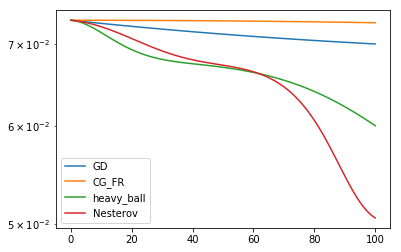

In [23]:

m, n = 100, 500
A = np.random.uniform(-100, 100, (m, n))
print(A)
b = np.random.uniform(-100, 100, n)
x0 = np.random.uniform(-100, 100, n)
res = research(A / np.linalg.norm(A, 'fro'), b, x0).get_all()
for i in res:
    plt.semilogy(i[0], label = i[1])

plt.legend()

### Константный шаг $\alpha = 0.5$

/home/ased/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


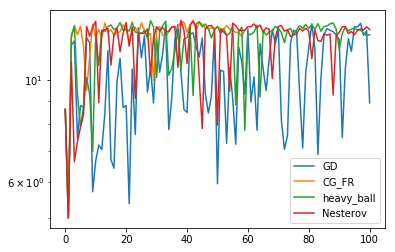

In [7]:
A = np.random.uniform(-1, 1, (m, n))
b = np.random.uniform(-1, 1, n)
x0 = np.random.uniform(-1, 1, n)
q = research(A, b, x0)
q.param = 'big_const'
res = q.get_all()
for i in res:
    plt.semilogy(i[0], label = i[1])

plt.legend()

### Константный шаг $\alpha = 0.01$

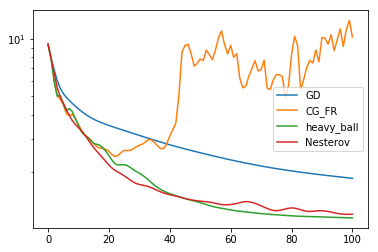

In [8]:
A = np.random.uniform(-1, 1, (m, n))
b = np.random.uniform(-1, 1, n)
x0 = np.random.uniform(-1, 1, n)
q = research(A, b, x0)
q.param = 'small_const'
res = q.get_all()
for i in res:
    plt.semilogy(i[0], label = i[1])

plt.legend()

Выбор шага, как поиск локального минимума в направлении, дает приблизительно результат для всех методов кроме метода сопряженных градиентов. Для него поиск локального минимума лучше. Хотя стоит заметить, что метод сопряженных градиентов начинает показывать хорошие результаты, когда шаг очень маленький.

Для вычислительной устойчивости была проделана нормировка градиента на корень его нормы и ограничения диапазона поиска шага. Эта нормировка действительно дала возможность проводить вычисления, в чем можно убедиться по тому, что программа успешно выполняется. Стоит заметить, что при уменьшении нормы градиента, возможно, стоит расширить диапазон для шага или убрать эту схему.